In [1]:
import readCorpus as rc
import translateLabels as tl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag

In [4]:
trainingCorpusText = rc.readCorpus('..\\2019\\datasets-v2\\datasets\\train-articles')
trainingCorpusLabels = rc.readCorpusLabels('..\\2019\\datasets-v2\\datasets\\train-labels-SLC')
trainingCorpusLabels['label'] = tl.binaryTranslation_Word2Int(trainingCorpusLabels['label'])

In [5]:
blankList = [0] * len(trainingCorpusText['articleID'])

In [6]:
datasetFeatures = {
    'len':          blankList.copy(),
    'CC':           blankList.copy(),
    'CD' :          blankList.copy(),
    'DT' :          blankList.copy(),
    'IN' :          blankList.copy(),
    'JJ' :          blankList.copy(),
    'NN' :          blankList.copy(),
    'NNP' :         blankList.copy(),
    'PRP' :         blankList.copy(), 
    'RB' :          blankList.copy(),
    'VB' :          blankList.copy(),
    'WP' :          blankList.copy(),
    'label':        blankList.copy()
}

In [7]:
tokeniser = RegexpTokenizer(r'\w+')

In [8]:
for i in range(len(trainingCorpusText['articleID'])):
    text = trainingCorpusText['text'][i]
    tokens = tokeniser.tokenize(text)
    tagger = Counter([j for i, j in pos_tag(tokens)])
    sentenceLength = len(tokens)

    datasetFeatures['len'][i] = sentenceLength
    datasetFeatures['label'][i] = trainingCorpusLabels['label'][i]

    for key in tagger:
        if key in ['JJ', 'JJR', 'JJS']:
            datasetFeatures['JJ'][i] += tagger[key]
        elif key in ['NN', 'NNS']:
            datasetFeatures['NN'][i] += tagger[key]
        elif key in ['NNP', 'NNPS']:
            datasetFeatures['NNP'][i] += tagger[key]
        elif key in ['PRP', 'PRP$']:
            datasetFeatures['PRP'][i] += tagger[key]
        elif key in ['RB', 'RBR', 'RBS', 'WRB']:
            datasetFeatures['RB'][i] += tagger[key]
        elif key in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
            datasetFeatures['VB'][i] += tagger[key]
        elif key in ['WP', 'WP$']:
            datasetFeatures['WP'][i] += tagger[key]
        elif key in datasetFeatures:
            datasetFeatures[key][i] = tagger[key]

In [9]:
datasetFeatures['Conjunction'] = datasetFeatures.pop('CC')
datasetFeatures['Cardinal Digit'] = datasetFeatures.pop('CD')
datasetFeatures['Determiner'] = datasetFeatures.pop('DT')
datasetFeatures['Preposition'] = datasetFeatures.pop('IN')
datasetFeatures['Adjective'] = datasetFeatures.pop('JJ')
datasetFeatures['Noun'] = datasetFeatures.pop('NN')
datasetFeatures['Proper Noun'] = datasetFeatures.pop('NNP')
datasetFeatures['Personal Pronoun'] = datasetFeatures.pop('PRP')
datasetFeatures['Adverb'] = datasetFeatures.pop('RB')
datasetFeatures['Verb'] = datasetFeatures.pop('VB')
datasetFeatures['wh-Pronoun'] = datasetFeatures.pop('WP')

In [10]:
dataset = pd.DataFrame.from_dict(datasetFeatures)

In [11]:
dataset.head(20)

,len,label,Conjunction,Cardinal Digit,Determiner,Preposition,Adjective,Noun,Proper Noun,Personal Pronoun,Adverb,Verb,wh-Pronoun
0,6,0,0,0,0,2,0,1,1,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16,0,0,1,2,1,1,1,4,0,0,6,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14,1,1,0,0,1,1,2,8,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19,0,0,0,1,2,2,1,6,1,1,4,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0
8,21,0,0,0,3,1,2,7,0,0,1,4,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
len,16965.0,20.154141,14.943535,0.0,9.0,17.0,28.0,132.0
label,16965.0,0.278220,0.448135,0.0,0.0,0.0,1.0,1.0
Conjunction,16965.0,0.630828,0.918799,0.0,0.0,0.0,1.0,10.0
Cardinal Digit,16965.0,0.375950,1.056754,0.0,0.0,0.0,0.0,32.0
Determiner,16965.0,2.110875,2.042153,0.0,1.0,2.0,3.0,19.0
Preposition,16965.0,2.526790,2.498019,0.0,1.0,2.0,4.0,24.0
Adjective,16965.0,1.398998,1.607248,0.0,0.0,1.0,2.0,15.0
Noun,16965.0,3.853404,3.418558,0.0,1.0,3.0,6.0,33.0
Proper Noun,16965.0,2.616976,3.225429,0.0,0.0,2.0,4.0,37.0
Personal Pronoun,16965.0,1.034601,1.328560,0.0,0.0,1.0,2.0,17.0


In [13]:
datasetCorrelation = dataset.corr()

datasetCorrelation

,len,label,Conjunction,Cardinal Digit,Determiner,Preposition,Adjective,Noun,Proper Noun,Personal Pronoun,Adverb,Verb,wh-Pronoun
len,1.000000,0.232937,0.580263,0.245015,0.810333,0.872320,0.684776,0.854344,0.543572,0.474483,0.514704,0.842213,0.282965
label,0.232937,1.000000,0.161276,-0.035039,0.198307,0.183912,0.221771,0.200086,0.078134,0.141653,0.170720,0.213108,0.095105
Conjunction,0.580263,0.161276,1.000000,0.083029,0.420088,0.430258,0.420213,0.511245,0.216062,0.317164,0.312433,0.474283,0.139459
Cardinal Digit,0.245015,-0.035039,0.083029,1.000000,0.111361,0.193275,0.107181,0.182185,0.193819,-0.018755,0.047128,0.101427,0.017693
Determiner,0.810333,0.198307,0.420088,0.111361,1.000000,0.740407,0.539879,0.729986,0.348916,0.253206,0.368751,0.620762,0.198310
Preposition,0.872320,0.183912,0.430258,0.193275,0.740407,1.000000,0.571319,0.760889,0.449321,0.386322,0.377748,0.657786,0.202629
Adjective,0.684776,0.221771,0.420213,0.107181,0.539879,0.571319,1.000000,0.631557,0.218048,0.228381,0.349138,0.514731,0.171438
Noun,0.854344,0.200086,0.511245,0.182185,0.729986,0.760889,0.631557,1.000000,0.282819,0.288723,0.354165,0.656817,0.189260
Proper Noun,0.543572,0.078134,0.216062,0.193819,0.348916,0.449321,0.218048,0.282819,1.000000,0.050222,0.108521,0.303431,0.103416
Personal Pronoun,0.474483,0.141653,0.317164,-0.018755,0.253206,0.386322,0.228381,0.288723,0.050222,1.000000,0.331571,0.551491,0.169067


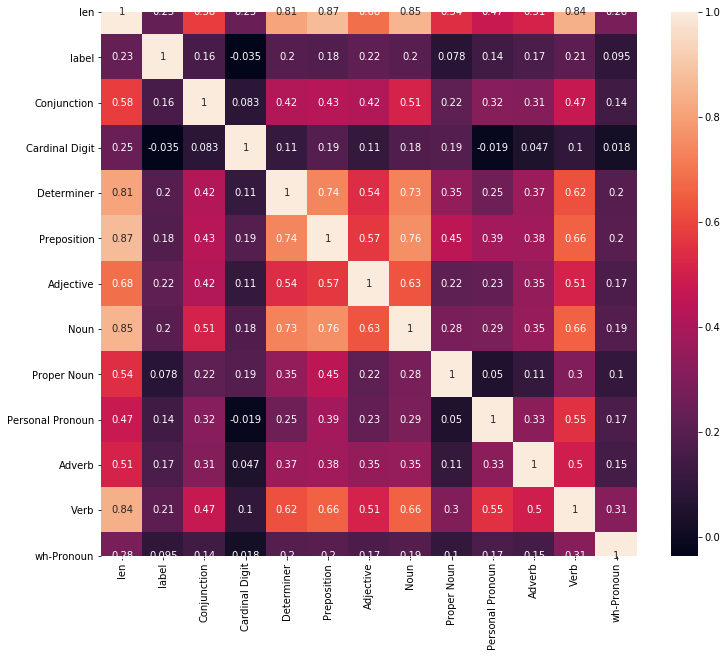

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(datasetCorrelation, annot=True)

In [15]:
featureMap = []
for i in range(len(datasetFeatures)):
    featureMap.append([0, 0])
    
print(len(featureMap))

13


In [16]:
j = 0
for key in datasetFeatures:
    for i in range(len(datasetFeatures['label'])):
        if not key == 'label':
            feature = datasetFeatures[key][i] 
            if not isinstance(feature, str):
                if feature > 0 and datasetFeatures['label'][i] == 1:
                    featureMap[j][0] += 1
                elif feature > 0 and datasetFeatures['label'][i] == 0:
                    featureMap[j][1] += 1
            else:
                print(feature)
    featureMap[j].append(key)
    j += 1
print(j)

13


In [17]:
for i in range(len(featureMap)):
    print('FEATURE: {0} | Propaganda: {1} / Non-Propaganda: {2}'.format(featureMap[i][2], featureMap[i][0], featureMap[i][1]))

FEATURE: len | Propaganda: 4719 / Non-Propaganda: 11496
FEATURE: label | Propaganda: 0 / Non-Propaganda: 0
FEATURE: Conjunction | Propaganda: 2536 / Non-Propaganda: 4659
FEATURE: Cardinal Digit | Propaganda: 935 / Non-Propaganda: 2657
FEATURE: Determiner | Propaganda: 4126 / Non-Propaganda: 8809
FEATURE: Preposition | Propaganda: 4073 / Non-Propaganda: 9058
FEATURE: Adjective | Propaganda: 3621 / Non-Propaganda: 7152
FEATURE: Noun | Propaganda: 4398 / Non-Propaganda: 10151
FEATURE: Proper Noun | Propaganda: 3593 / Non-Propaganda: 8050
FEATURE: Personal Pronoun | Propaganda: 3109 / Non-Propaganda: 6301
FEATURE: Adverb | Propaganda: 3074 / Non-Propaganda: 5937
FEATURE: Verb | Propaganda: 4517 / Non-Propaganda: 10416
FEATURE: wh-Pronoun | Propaganda: 802 / Non-Propaganda: 1241
